In [1]:
import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import Series, DataFrame

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sb

In [2]:
import sys
sys.path.append('/Users/trieutlh/PythonFunctionForDA/')
import AutomatedEDA as fun

In [3]:
# Set the style of the plot
sb.set_style('whitegrid')

In [4]:
# Load the data
address = '/Users/trieutlh/Library/CloudStorage/OneDrive-UW/SCU Project/Merged Data_20240416 (CURRENT)/LoanTransactionLeftJoins.csv'
df = pd.read_csv(address)
df.head()

,PARENTACCOUNT,ID,LOANCODE,CREDITSCORE,ORIGINALBALANCE,ORIGINALRATE,TYPE,INTERESTRATE,BRANCH,PURPOSECODE,...,_03,_04,_05,_06,_07,_08,_09,_10,_11,_12
0,131926,31,1,NaN,8394.33,0.00,99,0.00,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,131926,32,1,NaN,6779.18,0.00,99,0.00,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,291397,1,0,784.0,11457.00,3.19,10,3.19,9,611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,470553,1,0,757.0,10484.50,3.49,12,3.49,16,121,...,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0
4,614845,1,0,752.0,24558.00,4.54,10,4.54,97,611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0


In [5]:
# Check the data 
df.describe()

,PARENTACCOUNT,ID,LOANCODE,CREDITSCORE,ORIGINALBALANCE,ORIGINALRATE,TYPE,INTERESTRATE,BRANCH,PURPOSECODE,...,_03,_04,_05,_06,_07,_08,_09,_10,_11,_12
count,1.857770e+05,185777.000000,185777.000000,153505.000000,1.857770e+05,185777.000000,185777.000000,185777.000000,185777.000000,185777.000000,...,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000
mean,5.002951e+09,16.418373,0.969878,613.109560,2.318770e+04,6.736891,45.067974,7.290133,49.490777,374.168196,...,11.089749,11.277790,11.717403,11.518770,11.932870,12.153019,11.360413,10.896673,10.822353,11.423163
std,2.885301e+09,25.538003,1.355445,357.350259,1.419125e+05,5.080137,36.863105,5.203738,36.669245,279.869951,...,38.008778,38.639524,40.804986,39.503527,41.334809,41.091137,38.958378,37.911997,37.485687,40.082019
min,1.319260e+05,0.000000,0.000000,0.000000,0.000000e+00,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.497674e+09,1.000000,0.000000,665.000000,5.000100e+03,3.540000,10.000000,3.690000,10.000000,80.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.002972e+09,1.000000,0.000000,724.000000,1.308564e+04,4.940000,28.000000,5.290000,55.000000,610.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,7.498477e+09,31.000000,3.000000,773.000000,2.503550e+04,10.690000,80.000000,11.650000,83.000000,611.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,9.999979e+09,99.000000,5.000000,9999.000000,1.870000e+07,21.950000,99.000000,22.000000,99.000000,911.000000,...,1623.000000,1446.000000,1562.000000,1774.000000,1544.000000,995.000000,1104.000000,927.000000,1277.000000,1897.000000


In [6]:
# Print the shape of the dataframe
print(df.shape)

# Print column names
print(df.columns)

(185777, 41)
Index(['PARENTACCOUNT', 'ID', 'LOANCODE', 'CREDITSCORE', 'ORIGINALBALANCE',
       'ORIGINALRATE', 'TYPE', 'INTERESTRATE', 'BRANCH', 'PURPOSECODE',
       'APPROVALDATE', 'PAYMENT', 'DQ', 'BALANCE_01', 'BALANCE_02',
       'BALANCE_03', 'BALANCE_04', 'BALANCE_05', 'BALANCE_06', 'BALANCE_07',
       'BALANCE_08', 'BALANCE_09', 'BALANCE_10', 'BALANCE_11', 'BALANCE_12',
       'A', 'C', 'N', 'P', '_01', '_02', '_03', '_04', '_05', '_06', '_07',
       '_08', '_09', '_10', '_11', '_12'],
      dtype='object')


In [7]:
# Subset the data
df_subset = df[['LOANCODE', 'CREDITSCORE', 'ORIGINALBALANCE', 
               'TYPE', 'INTERESTRATE', 'BRANCH', 'PURPOSECODE', 'DQ',
               'A', 'C', 'N', 'P']]



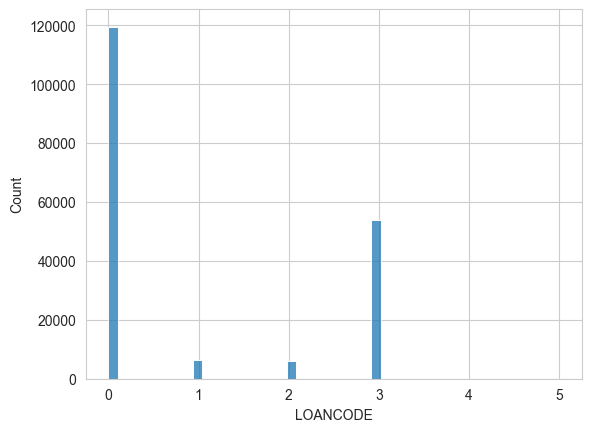

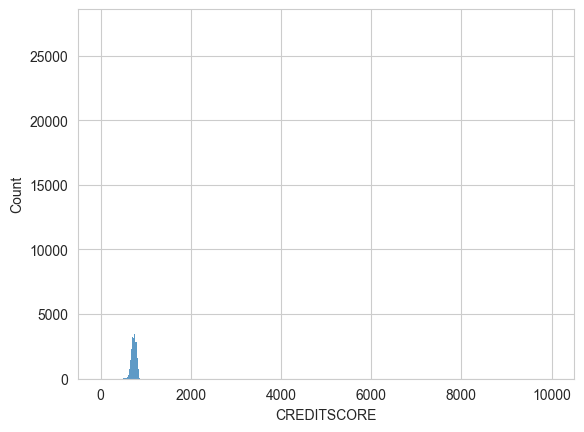

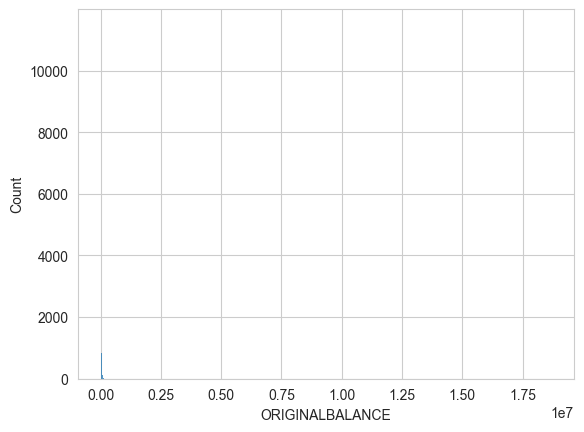

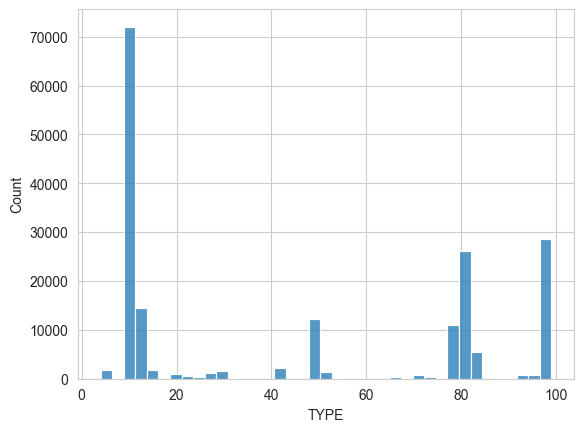

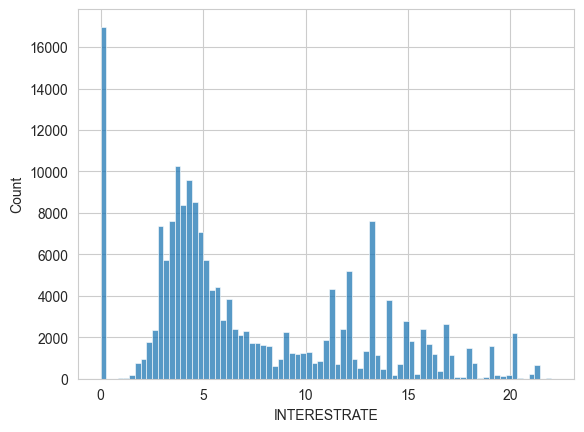

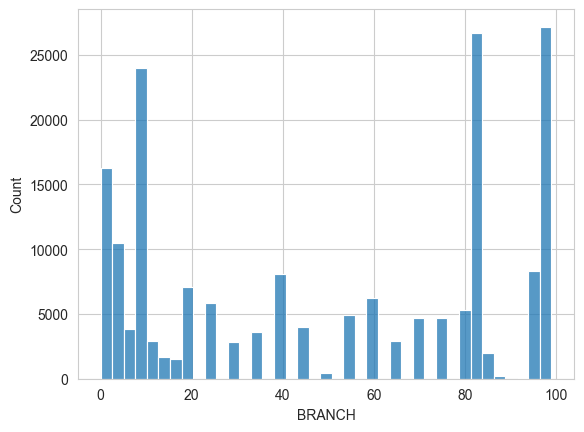

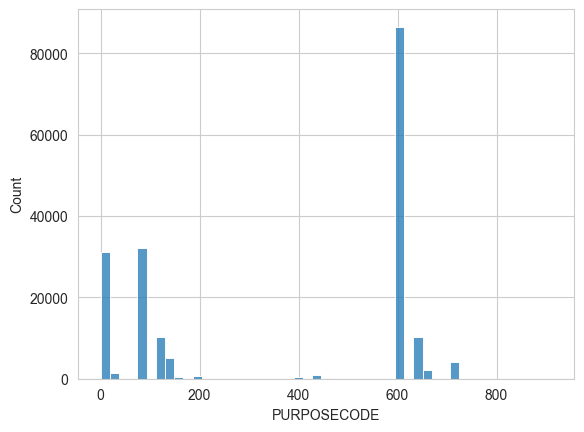

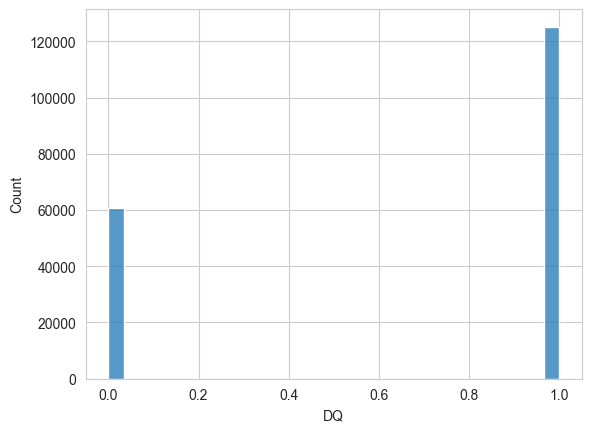

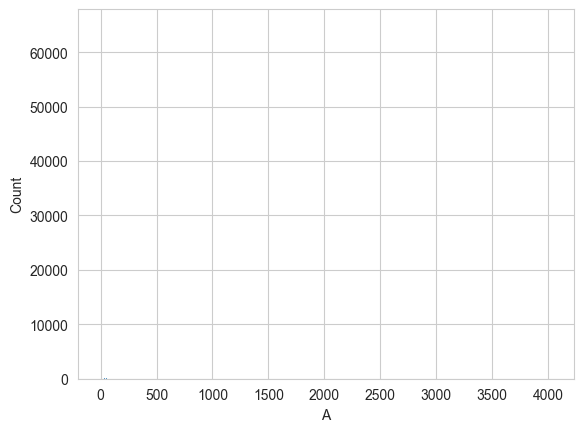

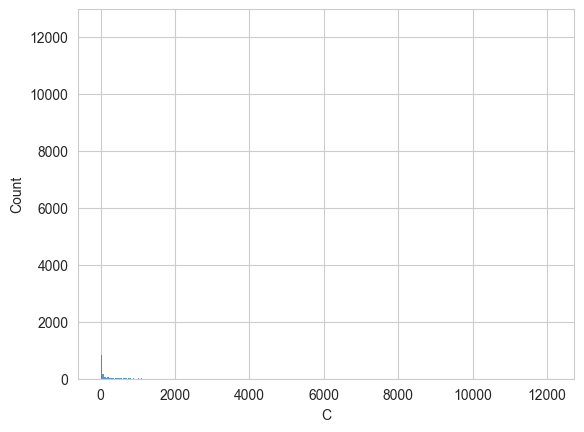

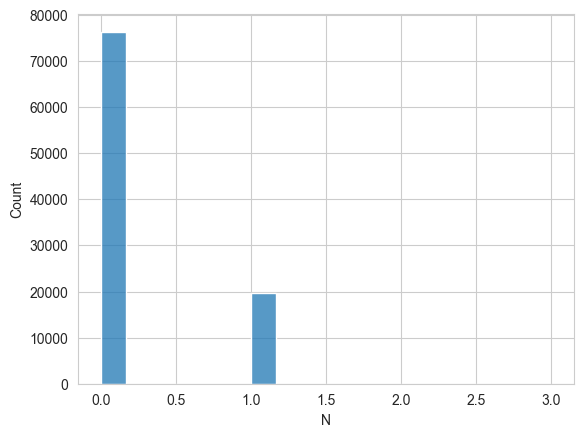

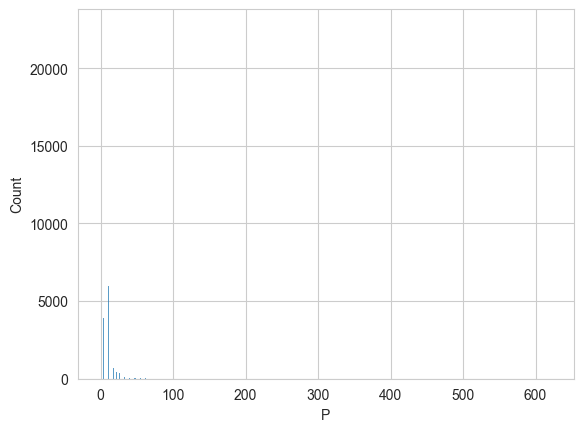

,type,count,missing,unique,mode,min,q1,median,q3,max,mean,std,skew,kurt
feature,,,,,,,,,,,,,,
LOANCODE,int64,185777,0,5,0.0,0.0,0.00,0.00,3.00,5.0,0.969878,1.355445,0.757177,-1.348468
CREDITSCORE,float64,153505,32272,419,0.0,0.0,665.00,724.00,773.00,9999.0,613.109560,357.350259,8.029896,220.950856
ORIGINALBALANCE,float64,185777,0,146501,0.0,0.0,5000.10,13085.64,25035.50,18700000.0,23187.703638,141912.518863,61.809272,5721.186107
TYPE,int64,185777,0,70,10.0,4.0,10.00,28.00,80.00,99.0,45.067974,36.863105,0.291063,-1.684419
INTERESTRATE,float64,185777,0,847,0.0,0.0,3.69,5.29,11.65,22.0,7.290133,5.203738,0.703589,-0.458277
BRANCH,int64,185777,0,43,97.0,0.0,10.00,55.00,83.00,99.0,49.490777,36.669245,-0.016018,-1.655939
PURPOSECODE,int64,185777,0,153,611.0,0.0,80.00,610.00,611.00,911.0,374.168196,279.869951,-0.284315,-1.837205
DQ,int64,185777,0,2,1.0,0.0,0.00,1.00,1.00,1.0,0.673770,0.468834,-0.741295,-1.450498
A,float64,96112,89665,1017,0.0,0.0,0.00,0.00,4.00,4030.0,27.342985,102.649103,7.754122,100.900281


In [8]:
fun.univariate(df_subset)

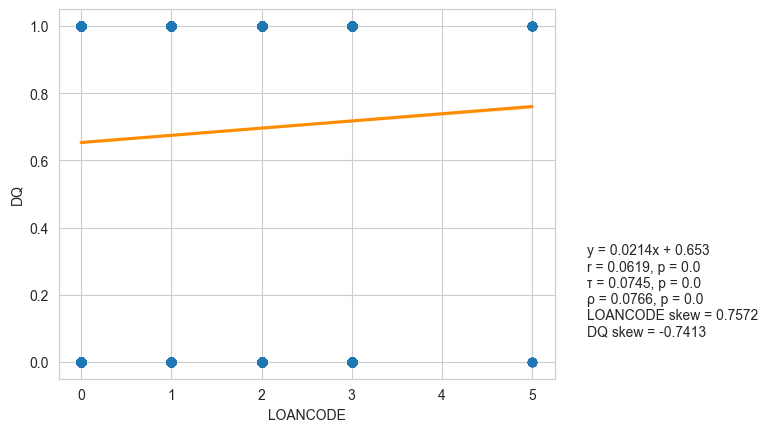

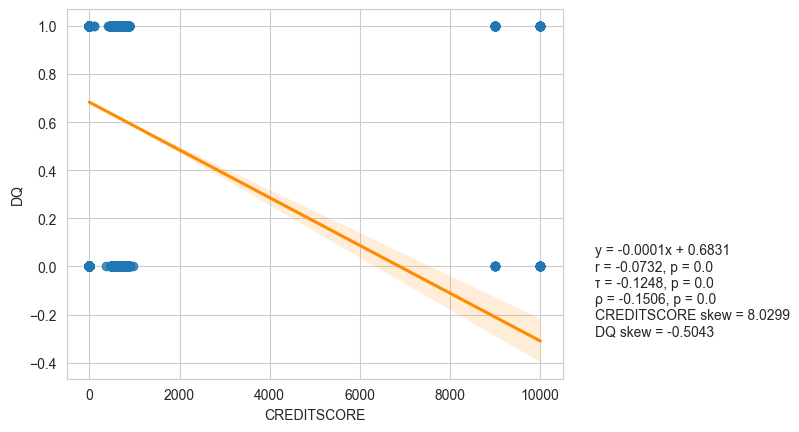

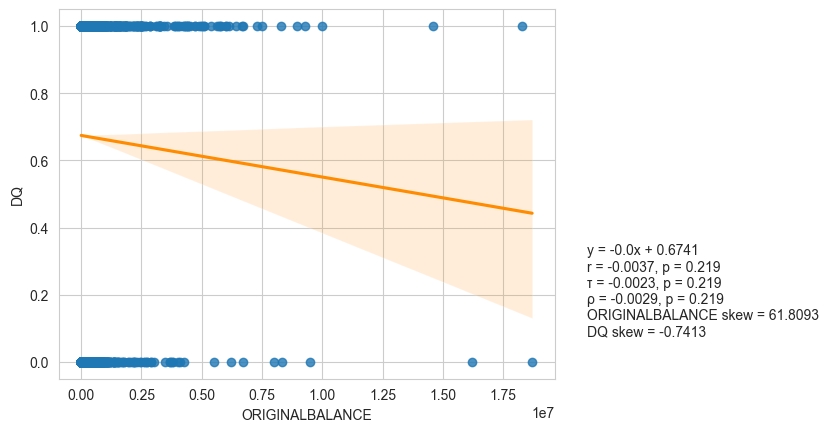

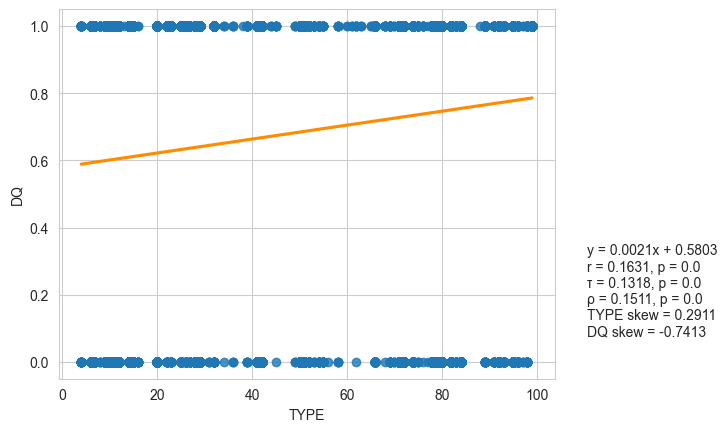

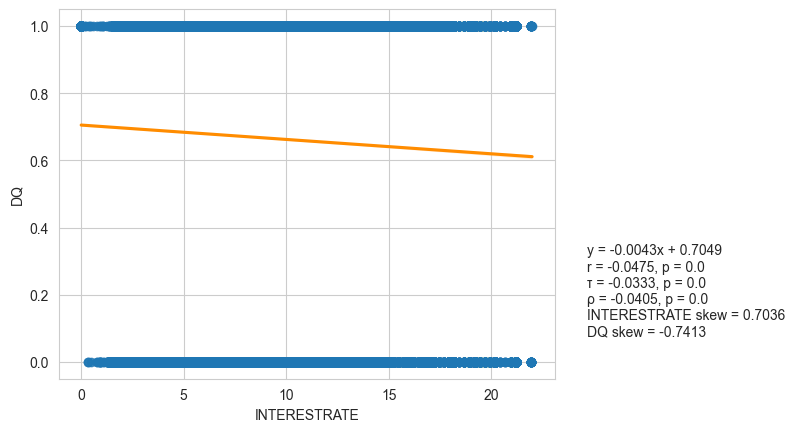

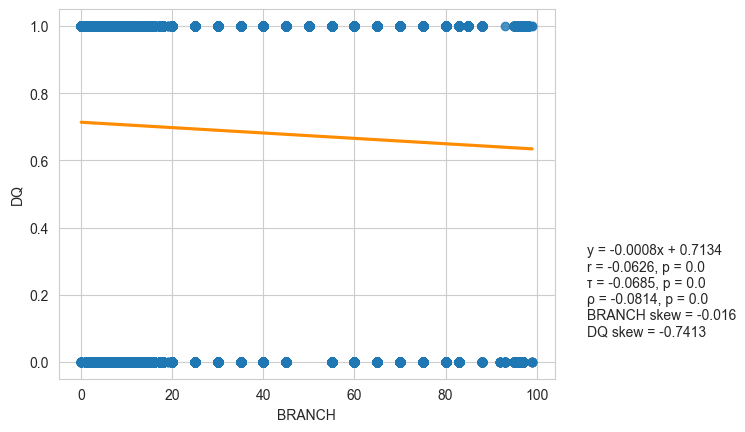

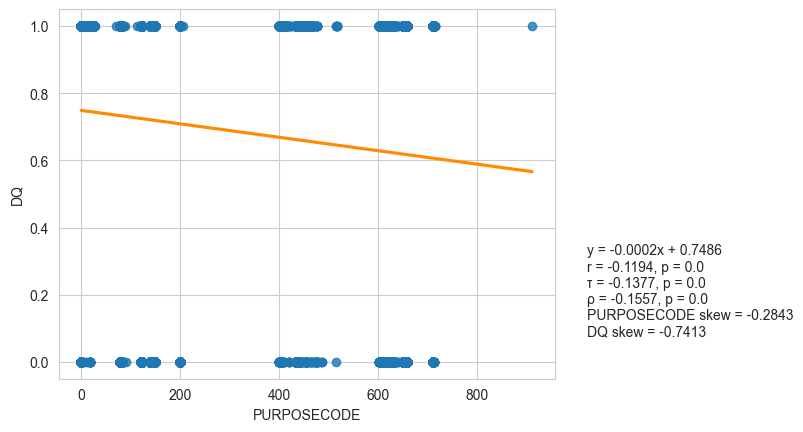

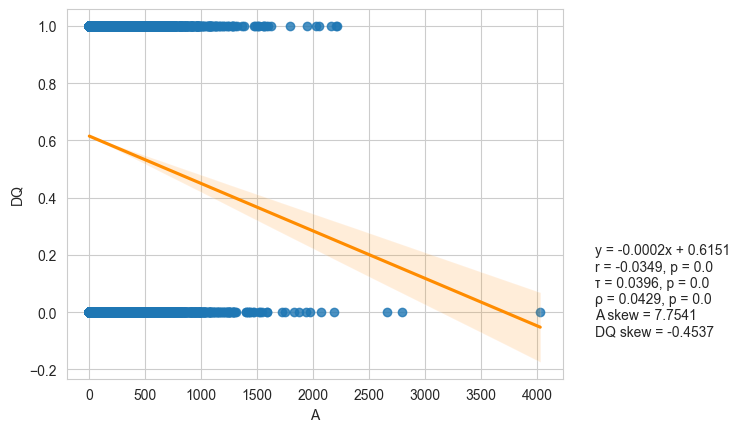

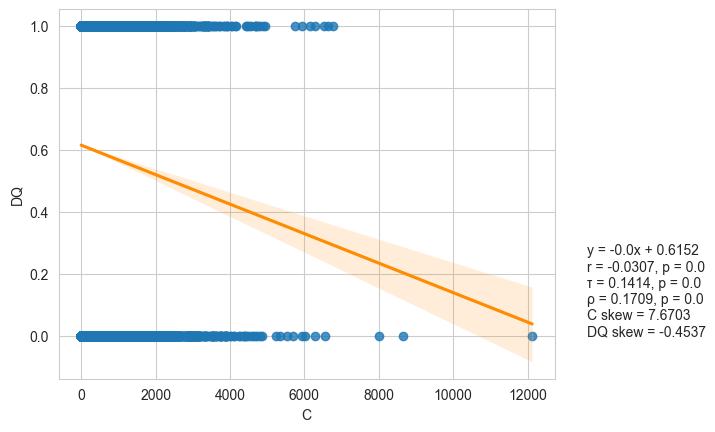

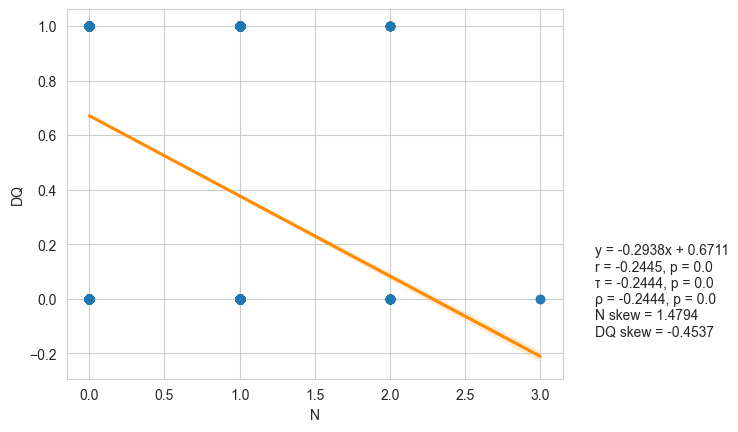

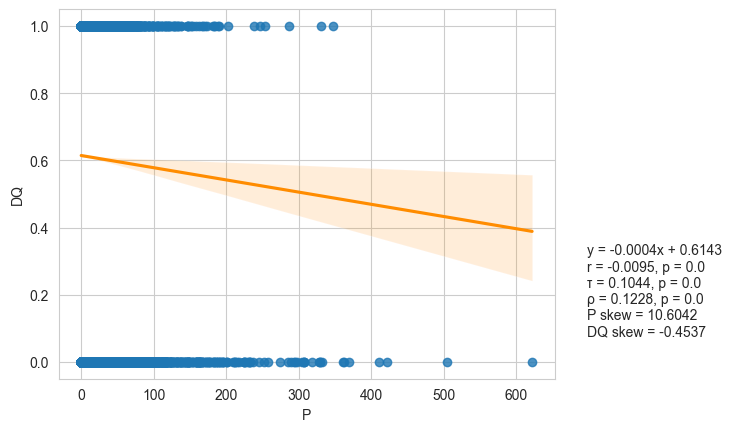

,missing %,skew,type,unique,p,r,τ,ρ,y = m(x) + b,F,X2
LOANCODE,0.0%,0.7572,int64,5,0.0000,0.0619,0.0745,0.0766,y = 0.0214x + 0.653,-,-
CREDITSCORE,17.37%,8.0299,float64,419,0.0000,-0.0732,-0.1248,-0.1506,y = -0.0001x + 0.6831,-,-
TYPE,0.0%,0.2911,int64,70,0.0000,0.1631,0.1318,0.1511,y = 0.0021x + 0.5803,-,-
INTERESTRATE,0.0%,0.7036,float64,847,0.0000,-0.0475,-0.0333,-0.0405,y = -0.0043x + 0.7049,-,-
BRANCH,0.0%,-0.0160,int64,43,0.0000,-0.0626,-0.0685,-0.0814,y = -0.0008x + 0.7134,-,-
PURPOSECODE,0.0%,-0.2843,int64,153,0.0000,-0.1194,-0.1377,-0.1557,y = -0.0002x + 0.7486,-,-
A,48.26%,7.7541,float64,1017,0.0000,-0.0349,0.0396,0.0429,y = -0.0002x + 0.6151,-,-
C,48.26%,7.6703,float64,2234,0.0000,-0.0307,0.1414,0.1709,y = -0.0x + 0.6152,-,-
N,48.26%,1.4794,float64,4,0.0000,-0.2445,-0.2444,-0.2444,y = -0.2938x + 0.6711,-,-
P,48.26%,10.6042,float64,225,0.0033,-0.0095,0.1044,0.1228,y = -0.0004x + 0.6143,-,-


In [9]:
fun.bivariate(df_subset, 'DQ')

In [10]:
df['LOANCODE'].value_counts()

LOANCODE
0    119490
3     53863
1      6349
2      6044
5        31
Name: count, dtype: int64

In [11]:
pd.crosstab(df['LOANCODE'], df['DQ'])

DQ,0,1
LOANCODE,,
0,42919,76571
1,120,6229
2,1358,4686
3,16203,37660
5,6,25


DQ
1    0.67377
0    0.32623
Name: proportion, dtype: float64


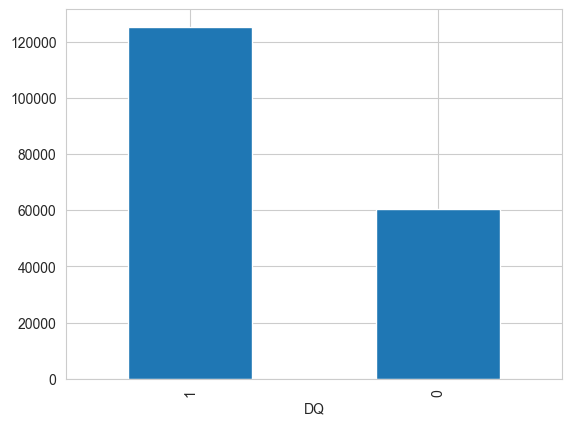

In [12]:
df['DQ'].value_counts().plot(kind='bar')
print(df['DQ'].value_counts(normalize=True))

In [13]:
# Verify any missing values
print(df.isnull().sum())

PARENTACCOUNT          0
ID                     0
LOANCODE               0
CREDITSCORE        32272
ORIGINALBALANCE        0
ORIGINALRATE           0
TYPE                   0
INTERESTRATE           0
BRANCH                 0
PURPOSECODE            0
APPROVALDATE       15620
PAYMENT                0
DQ                     0
BALANCE_01             0
BALANCE_02          1857
BALANCE_03          4228
BALANCE_04          6325
BALANCE_05          8838
BALANCE_06         10808
BALANCE_07         12749
BALANCE_08         14891
BALANCE_09         16617
BALANCE_10         18242
BALANCE_11         19851
BALANCE_12         21734
A                  89665
C                  89665
N                  89665
P                  89665
_01                89665
_02                89665
_03                89665
_04                89665
_05                89665
_06                89665
_07                89665
_08                89665
_09                89665
_10                89665
_11                89665


In [14]:
print(df.shape)


(185777, 41)


In [15]:
# Handling missing values in CREDITSCORE. Fill with 706
df['CREDITSCORE'] = df['CREDITSCORE'].fillna(706)

# Handling missing values in df. Fill with 0
df = df.fillna(0)

# Get only rows with CREDITSCORE > 300 AND CREDITSCORE < 850
df = df[(df['CREDITSCORE'] >= 300) & (df['CREDITSCORE'] <= 850)]

# Get only rows with PAYMENT < 10000000000
df = df[df['PAYMENT'] < 10000000000]

# Check number of rows and columns in df
print(df.shape)

(157611, 41)


In [16]:
df = df.drop('APPROVALDATE', axis=1)

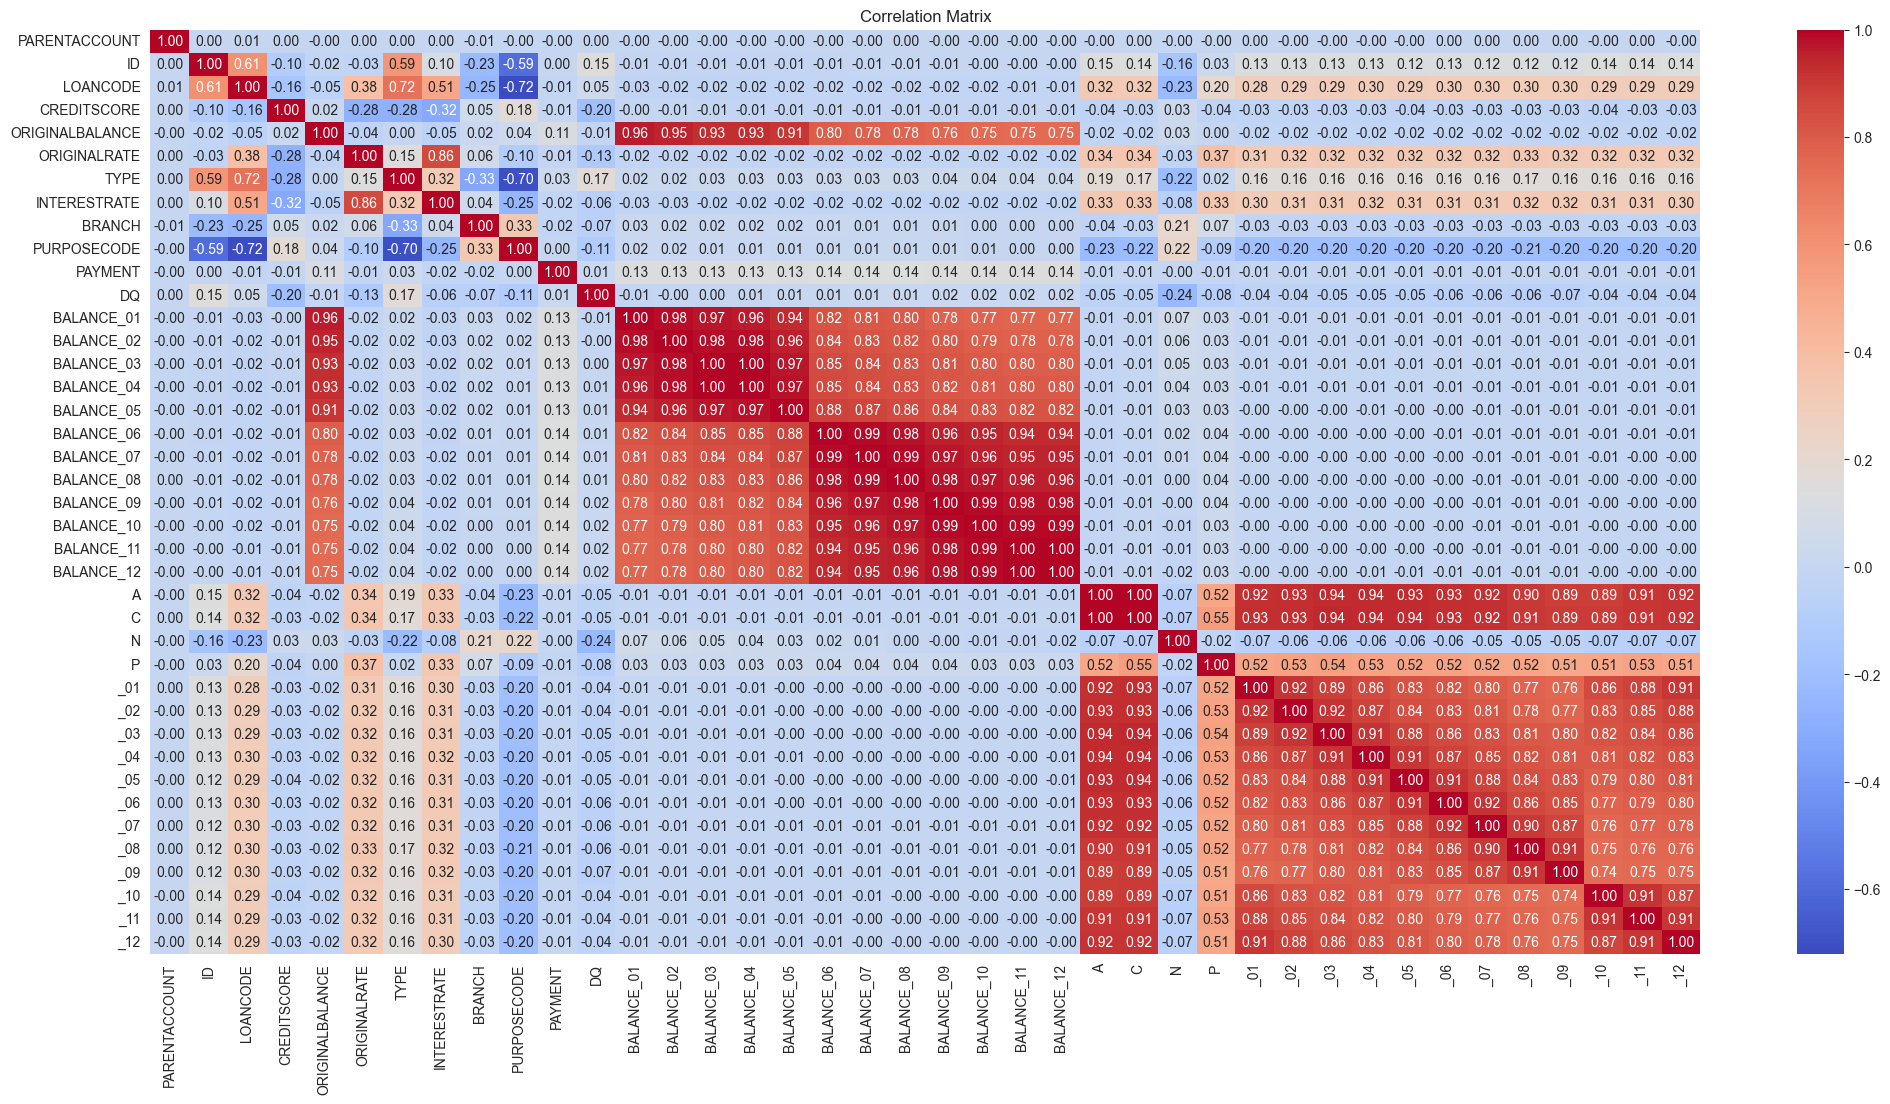

In [17]:
# Correlation Matrix
corr_df = df.corr(method='pearson', min_periods=1, numeric_only=False)

# Heatmap for the correlation matrix
plt.figure(figsize=(25, 12))
sb.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Subset the data for model building
df_subset = df[['LOANCODE', 'CREDITSCORE', 'TYPE', 'INTERESTRATE', 'BRANCH', 'PAYMENT', 'DQ', 
                'BALANCE_01', 'BALANCE_02', 'BALANCE_03', 'BALANCE_04', 'BALANCE_05', 'BALANCE_06',
                'BALANCE_08', 'BALANCE_09', 'BALANCE_10', 'BALANCE_12', 'A', 'C', 'N', 'P']]
print(df_subset.shape)

(157611, 21)


In [19]:
# Split the data into training and testing sets (70% training, 30% testing)
import random
random.seed(12345)

X = df_subset.drop('DQ', axis=1)
y = df_subset['DQ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(110327, 20)
(47284, 20)


In [20]:
# Two-class Boosted Decision Tree
# Create the model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2)
model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy: 0.7503595296506218
[[ 7056  8459]
 [ 3345 28424]]
              precision    recall  f1-score   support

           0       0.68      0.45      0.54     15515
           1       0.77      0.89      0.83     31769

    accuracy                           0.75     47284
   macro avg       0.72      0.67      0.69     47284
weighted avg       0.74      0.75      0.74     47284



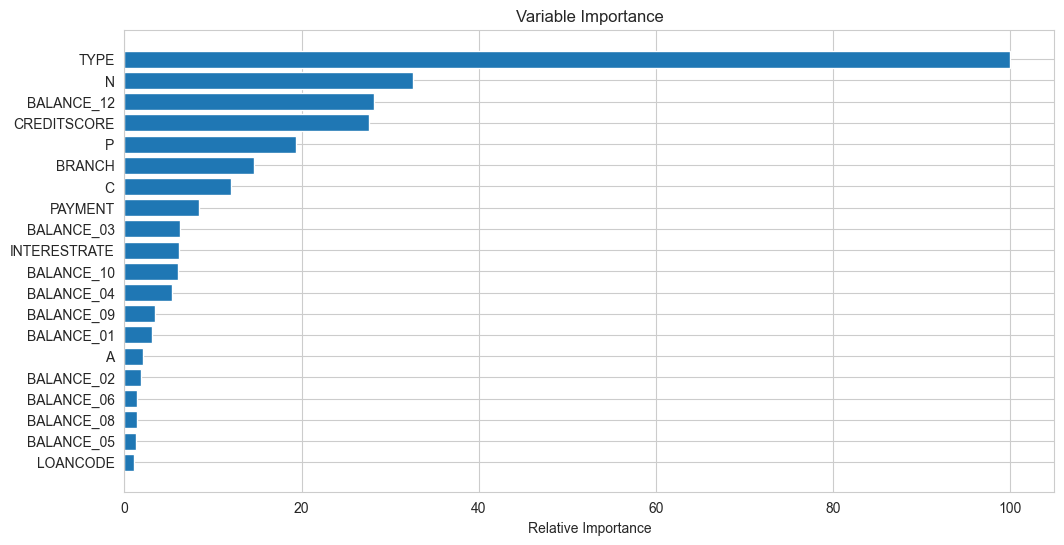

In [21]:
# Feature Importance
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Plot the feature importance
plt.figure(figsize=(12, 6))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

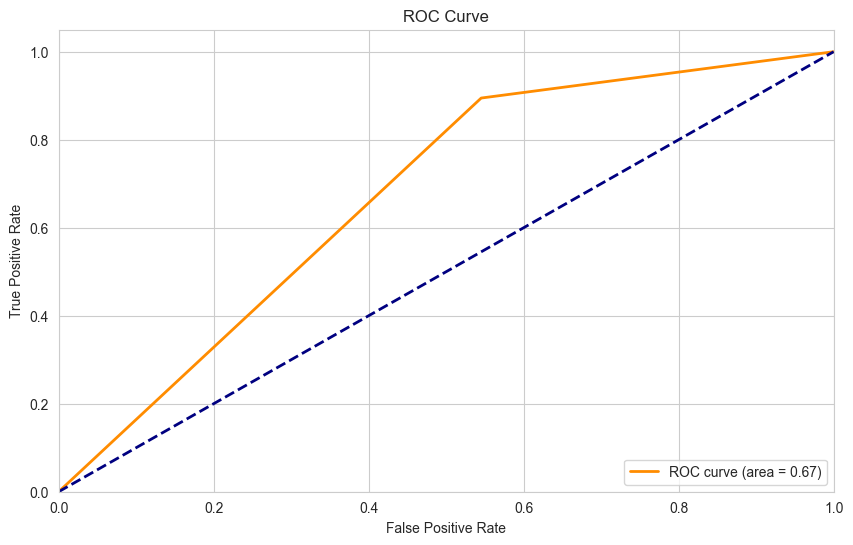

In [22]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()